In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [2]:
import numpy as np

In [3]:
np.random.seed(25101996)

In [4]:
data_directory = PATH_TO_DATA # !!! DEFINE "PATH_TO_DATA" on your local machine
train_df = pd.read_csv(f"{data_directory}/train_labels.csv")

samples_to_exclude = [109, 123, 709]

print("original shape", train_df.shape)
train_df = train_df[~train_df.BraTS21ID.isin(samples_to_exclude)]

original shape (585, 2)


In [5]:
train_df.reset_index(inplace=True, drop=True)

In [6]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
train_df['fold'] = -1
for i, (train_index, test_index) in enumerate(skf.split(train_df['BraTS21ID'], train_df['MGMT_value'])):
    train_df.loc[test_index, 'fold'] = i

In [7]:
train_df

,BraTS21ID,MGMT_value,fold
0,0,1,2
1,2,1,1
2,3,0,1
3,5,1,4
4,6,1,1
...,...,...,...
577,1005,1,2
578,1007,1,1
579,1008,1,1
580,1009,0,3


array([[<AxesSubplot:title={'center':'MGMT_value'}>]], dtype=object)

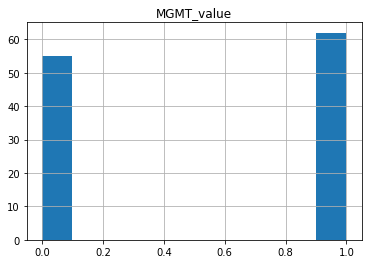

In [8]:
train_df[train_df.fold == 0][['MGMT_value']].hist()

array([[<AxesSubplot:title={'center':'MGMT_value'}>]], dtype=object)

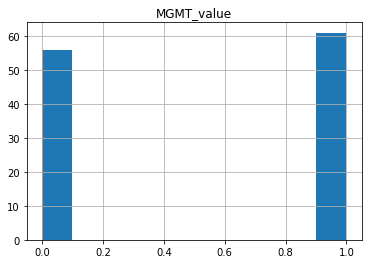

In [9]:
train_df[train_df.fold == 1][['MGMT_value']].hist()

array([[<AxesSubplot:title={'center':'MGMT_value'}>]], dtype=object)

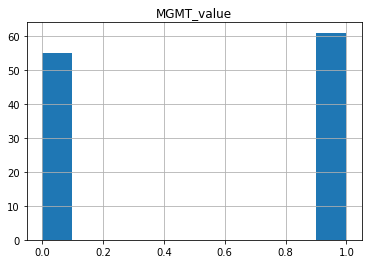

In [10]:
train_df[train_df.fold == 2][['MGMT_value']].hist()

array([[<AxesSubplot:title={'center':'MGMT_value'}>]], dtype=object)

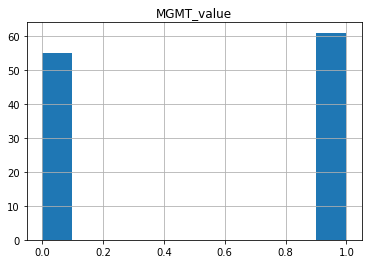

In [11]:
train_df[train_df.fold == 3][['MGMT_value']].hist()

array([[<AxesSubplot:title={'center':'MGMT_value'}>]], dtype=object)

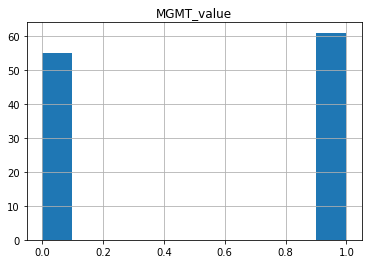

In [12]:
train_df[train_df.fold == 4][['MGMT_value']].hist()

In [13]:
train_df.to_csv('train_df_folds.csv', index=False)